#  Predict BAC stock price Using ML and Macroeconomics Variable 

# we will using historical data of Bank of america 
# we will use peer stock data , Index data
# oil price and gold price 


# feature engineering


# apply ML algo = decision tree , random forest , support vector machine , K nearest neighbour 



# evaluate model based on  R square , MSE , RMSE ,MAE etc



In [131]:
# important library


import pandas as pd
import numpy as np
import yfinance as yf


In [132]:
# importing data


# BAC = bank of america 
# JPM= JP morgan
# MS = morgan stanley
# C = citi group
# WFC = wells Fargo and co
# SPY = sp500
# ^VIX = volatility index 
# ^TNX = 10y US tresury yield 
# DX-Y.NYB = US dollar index 
# CL=F = Crude oil future 
# GC=F   = gold future 


tickers=['BAC','JPM','MS','C','WFC','SPY','^VIX','^TNX','DX-Y.NYB','CL=F','GC=F']

df=yf.download(tickers, start='2002-01-01', end='2025-01-01')['Close']

df

C:\Users\DELL\AppData\Local\Temp\ipykernel_8408\1158936933.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(tickers, start='2002-01-01', end='2025-01-01')['Close']
[*********************100%***********************]  11 of 11 completed


Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Date,,,,,,,,,,,
2002-01-02,17.739323,276.156769,21.010000,115.790001,278.899994,18.498011,27.954088,74.910172,11.306940,5.157,22.709999
2002-01-03,17.719595,276.373291,20.370001,116.110001,278.200012,18.991634,28.764042,75.759605,11.348589,5.120,21.340000
2002-01-04,17.995716,281.516357,21.620001,116.330002,278.899994,19.846554,30.191612,76.265366,11.377221,5.141,20.450001
2002-01-07,17.781576,278.214050,21.480000,116.330002,278.600006,19.795673,29.963818,75.727219,11.395438,5.057,21.940001
2002-01-08,17.497007,267.982025,21.250000,116.830002,278.899994,19.643003,29.336102,75.552094,11.351193,5.057,21.830000
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,43.843319,69.952347,70.099998,108.260002,2620.000000,238.440506,125.215462,597.729553,70.849594,4.591,14.270000
2024-12-26,44.011265,70.297188,69.620003,108.129997,2638.800049,239.257263,126.171379,597.769348,71.017845,4.579,14.730000
2024-12-27,43.803802,69.952347,70.599998,108.000000,2617.199951,237.318726,124.919815,591.476868,70.374565,4.619,15.950000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5810 entries, 2002-01-02 to 2024-12-31
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BAC       5789 non-null   float64
 1   C         5789 non-null   float64
 2   CL=F      5779 non-null   float64
 3   DX-Y.NYB  5807 non-null   float64
 4   GC=F      5775 non-null   float64
 5   JPM       5789 non-null   float64
 6   MS        5789 non-null   float64
 7   SPY       5789 non-null   float64
 8   WFC       5789 non-null   float64
 9   ^TNX      5783 non-null   float64
 10  ^VIX      5789 non-null   float64
dtypes: float64(11)
memory usage: 544.7 KB


In [134]:
df.describe()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
count,5789.000000,5789.000000,5779.000000,5807.000000,5775.000000,5789.000000,5789.000000,5789.000000,5789.000000,5783.000000,5789.000000
mean,21.966545,110.073952,66.811741,90.834779,1212.050857,60.420866,37.520453,189.236474,29.555229,3.079020,19.471192
std,9.983902,110.526009,24.071656,10.092432,555.276716,49.185052,23.835383,133.345654,13.009360,1.158701,8.613284
min,2.456464,7.663630,-37.630001,71.330002,278.100006,8.166404,6.460618,50.231033,5.385917,0.499000,9.140000
25%,12.661818,36.660889,48.520000,81.879997,732.649994,24.896488,21.585949,86.793755,18.207212,2.130000,13.610000
50%,22.729929,50.757568,66.230003,90.779999,1253.000000,37.699558,29.309088,133.422531,24.392462,2.979000,17.100000
75%,29.378302,197.121628,84.514999,97.825001,1648.750000,89.550346,42.486694,257.375549,40.995247,4.099500,22.530001
max,46.931259,383.228180,145.289993,120.239998,2788.500000,246.293076,133.030350,602.174133,76.550026,5.428000,82.690002


In [135]:
df.isnull().sum()

Ticker
BAC         21
C           21
CL=F        31
DX-Y.NYB     3
GC=F        35
JPM         21
MS          21
SPY         21
WFC         21
^TNX        27
^VIX        21
dtype: int64

Common Methods to Fill NaN (with when to use):


Mean Fill	         df['col'].fillna(df['col'].mean())	         when data is  symmetric (no outliers)

Median Fill     	df['col'].fillna(df['col'].median())	     when  outliers are there (robust method)

Mode Fill	        df['col'].fillna(df['col'].mode()[0])	      categorical data 

Forward Fill    	df.fillna(method='ffill')	                 Time series data (last known value)

Backward Fill   	df.fillna(method='bfill')                  	when we need to take  next known value 

Interpolation	    df.interpolate()	                        when values are continuous  (like temperature, stock price)

In [136]:
# forward fill / backward fill   missing values 
# Interpolation for filling missin values 

# eg - forwardfill = df=[100,np.nan,200]  at the place of np.nan it will fill last known value i.e 100 
 

df=df.ffill()

df.isnull().sum()

Ticker
BAC         0
C           0
CL=F        0
DX-Y.NYB    0
GC=F        0
JPM         0
MS          0
SPY         0
WFC         0
^TNX        0
^VIX        0
dtype: int64

In [137]:
# check corelation 


correlation_matrix = df.corr()
correlation_matrix['BAC']

Ticker
BAC         1.000000
C           0.461779
CL=F       -0.070637
DX-Y.NYB    0.360871
GC=F        0.071502
JPM         0.569557
MS          0.786216
SPY         0.544844
WFC         0.342323
^TNX        0.381009
^VIX       -0.214983
Name: BAC, dtype: float64

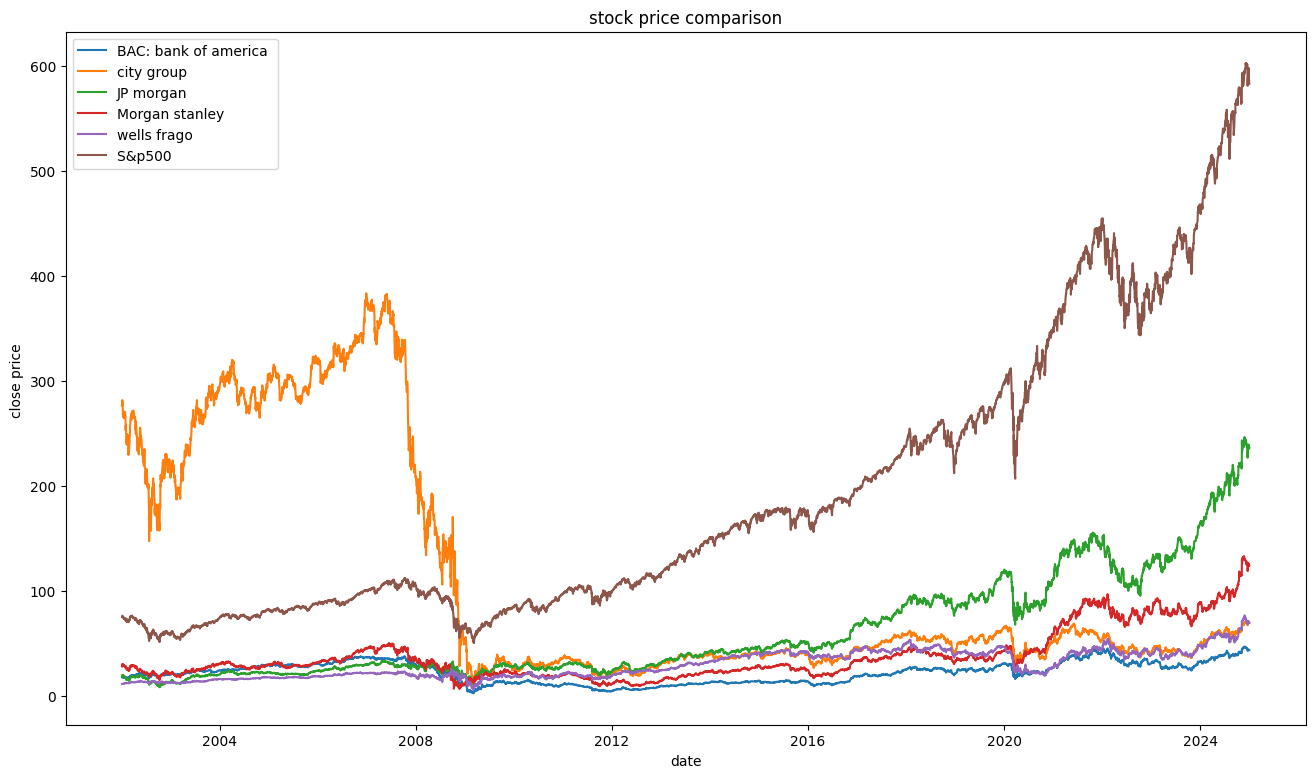

In [138]:
# visualization of how our stocks have performed 

import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))


plt.plot(df.index, df['BAC'] , label= 'BAC: bank of america ')
plt.plot(df.index, df['C'] , label= 'city group')
plt.plot(df.index, df['JPM'] , label= 'JP morgan ')
plt.plot(df.index, df['MS'] , label= 'Morgan stanley ')
plt.plot(df.index, df['WFC'] , label= 'wells frago ')
plt.plot(df.index, df['SPY'] , label= 'S&p500 ')


plt.title("stock price comparison")
plt.xlabel('date')
plt.ylabel('close price ')


plt.legend()


## when we look at the graph , filling missing value with avg value willl not be a good idea ,
## it can create a major spike of something like this , thats why we took forward fill


In [139]:
# feature engineering 

data=pd.DataFrame(index= df.index)
data

""
Date
2002-01-02
2002-01-03
2002-01-04
2002-01-07
2002-01-08
...
2024-12-24
2024-12-26
2024-12-27


In [140]:
# add features in this 

# lag feature - stock data

data['BAC(t-1)']   = df['BAC'].shift(1)
data['C(t-1)']     = df['C'].shift(1)
data['JPM(t-1)']   = df['JPM'].shift(1)
data['MS(t-1)']    = df['MS'].shift(1)
data['SPY(t-1)']   = df['SPY'].shift(1)
data['WFC(t-1)']   = df['WFC'].shift(1)

# lag feature for macro economics 

data['^TNX(t-1)']    = df['^TNX'].shift(1)
data['^VIX(t-1)']    = df['^VIX'].shift(1)
data['CL=F(t-1)']    = df['CL=F'].shift(1)
data['DX-Y.NYB(t-1)'] = df['DX-Y.NYB'].shift(1)
data['GC=F(t-1)']    = df['GC=F'].shift(1)

# technical indictors = moving avg , rolling volatility


data['BAC(ma_5)']     = df['BAC'].rolling(window=5).mean().shift(1)
data['BAC(ma_10)']     = df['BAC'].rolling(window=10).mean().shift(1)
data['BAC(vol_5)']    = df['BAC'].rolling(window=5).std().shift(1)


data['target'] = df['BAC']
data=data.dropna()
data

,BAC(t-1),C(t-1),JPM(t-1),MS(t-1),SPY(t-1),WFC(t-1),^TNX(t-1),^VIX(t-1),CL=F(t-1),DX-Y.NYB(t-1),GC=F(t-1),BAC(ma_5),BAC(ma_10),BAC(vol_5),target
Date,,,,,,,,,,,,,,,
2002-01-16,17.313866,269.173096,19.271515,29.402164,74.663834,11.796283,4.831,22.700001,18.900000,117.290001,284.399994,17.300903,17.523773,0.165332,17.130722
2002-01-17,17.130722,264.517059,18.579426,28.395832,73.153008,11.804089,4.839,23.450001,18.860001,117.589996,287.299988,17.236100,17.462913,0.153002,17.220881
2002-01-18,17.220881,270.147430,18.752459,29.295429,73.704170,11.871768,4.933,22.250000,18.040001,117.849998,284.399994,17.186510,17.413042,0.082780,17.130722
2002-01-21,17.130722,270.472260,18.274099,28.777018,73.367004,11.811901,4.888,22.520000,18.000000,117.510002,283.100006,17.180875,17.326542,0.086025,17.130722
2002-01-22,17.130722,270.472260,18.274099,28.777018,73.367004,11.811901,4.888,22.520000,18.000000,117.660004,283.100006,17.185382,17.261457,0.081749,17.657604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,43.359241,68.740494,234.583115,122.643349,591.158813,69.810455,4.599,16.780001,69.239998,108.040001,2612.300049,43.465937,44.360982,0.658623,43.843319
2024-12-26,43.843319,69.952347,238.440506,125.215462,597.729553,70.849594,4.591,14.270000,70.099998,108.260002,2620.000000,43.333558,44.225639,0.421258,44.011265
2024-12-27,44.011265,70.297188,239.257263,126.171379,597.769348,71.017845,4.579,14.730000,69.620003,108.129997,2638.800049,43.541019,44.074489,0.454041,43.803802


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5800 entries, 2002-01-16 to 2024-12-31
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BAC(t-1)       5800 non-null   float64
 1   C(t-1)         5800 non-null   float64
 2   JPM(t-1)       5800 non-null   float64
 3   MS(t-1)        5800 non-null   float64
 4   SPY(t-1)       5800 non-null   float64
 5   WFC(t-1)       5800 non-null   float64
 6   ^TNX(t-1)      5800 non-null   float64
 7   ^VIX(t-1)      5800 non-null   float64
 8   CL=F(t-1)      5800 non-null   float64
 9   DX-Y.NYB(t-1)  5800 non-null   float64
 10  GC=F(t-1)      5800 non-null   float64
 11  BAC(ma_5)      5800 non-null   float64
 12  BAC(ma_10)     5800 non-null   float64
 13  BAC(vol_5)     5800 non-null   float64
 14  target         5800 non-null   float64
dtypes: float64(15)
memory usage: 725.0 KB


In [142]:
# train ML algo


# tell what is x , y 
# split data 80:20
# apply algo
# do the prediction 
# evaluate the model 


# Separate X and Y
X = data.drop(columns=['target'])
Y = data['target']



In [144]:
# split data 90:10

from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, shuffle=False)


In [145]:
# apply ML model 



# decision tree

from sklearn.tree import DecisionTreeRegressor

dt_model=DecisionTreeRegressor()
dt_model.fit(X_train,Y_train)





# Random forest

from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, Y_train)




# KNN 

from sklearn.neighbors import KNeighborsRegressor

knn_model=KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train,Y_train)





# SVR 

from sklearn.svm import SVR

svr_model=SVR()
svr_model.fit(X_train,Y_train)



,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [146]:
# make prediction

dt_pred= dt_model.predict(X_test)
rf_pred=rf_model.predict(X_test)
knn_pred=knn_model.predict(X_test)
svr_pred=svr_model.predict(X_test)


In [148]:
# comaprison table

comparison_df = pd.DataFrame({
    'Actual': Y_test.values,
    'DecisionTree': dt_pred,
    'RandomForest': rf_pred,
    'KNN': knn_pred,
    'SVR': svr_pred
}, index=Y_test.index)
comparison_df

,Actual,DecisionTree,RandomForest,KNN,SVR
Date,,,,,
2022-09-12,32.761242,32.454723,32.033477,31.498338,33.073570
2022-09-13,31.581587,33.497284,32.464106,31.251209,33.381229
2022-09-14,31.460829,31.854719,31.667260,31.297351,32.038546
2022-09-15,32.055302,32.185352,31.538043,31.289872,32.163064
2022-09-16,31.693052,31.886366,32.026270,31.102024,32.115772
...,...,...,...,...,...
2024-12-24,43.843319,42.063820,43.056117,34.092492,34.854862
2024-12-26,44.011265,42.063820,43.088722,34.092492,34.968101
2024-12-27,43.803802,44.519886,43.802288,34.092492,34.583014


In [149]:
# evaluate models 

from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse


results = []

# Decision Tree
r2, mse, rmse = evaluate_model(Y_test, dt_pred)
results.append(['Decision Tree', r2, mse, rmse])

# Random Forest
r2, mse, rmse = evaluate_model(Y_test, rf_pred)
results.append(['Random Forest', r2, mse, rmse])

# KNN
r2, mse, rmse = evaluate_model(Y_test, knn_pred)
results.append(['KNN', r2, mse, rmse])

# SVR
r2, mse, rmse = evaluate_model(Y_test, svr_pred)
results.append(['SVR', r2, mse, rmse])


metrics_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MSE', 'RMSE'])
metrics_df = metrics_df.round(4)
print(metrics_df)


           Model  R2 Score      MSE    RMSE
0  Decision Tree    0.9620   1.2056  1.0980
1  Random Forest    0.9845   0.4909  0.7006
2            KNN   -0.5931  50.5035  7.1066
3            SVR    0.0113  31.3441  5.5986


C:\Users\DELL\AppData\Local\Temp\ipykernel_8408\3277163386.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\DELL\Desktop\python\regressionmode\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


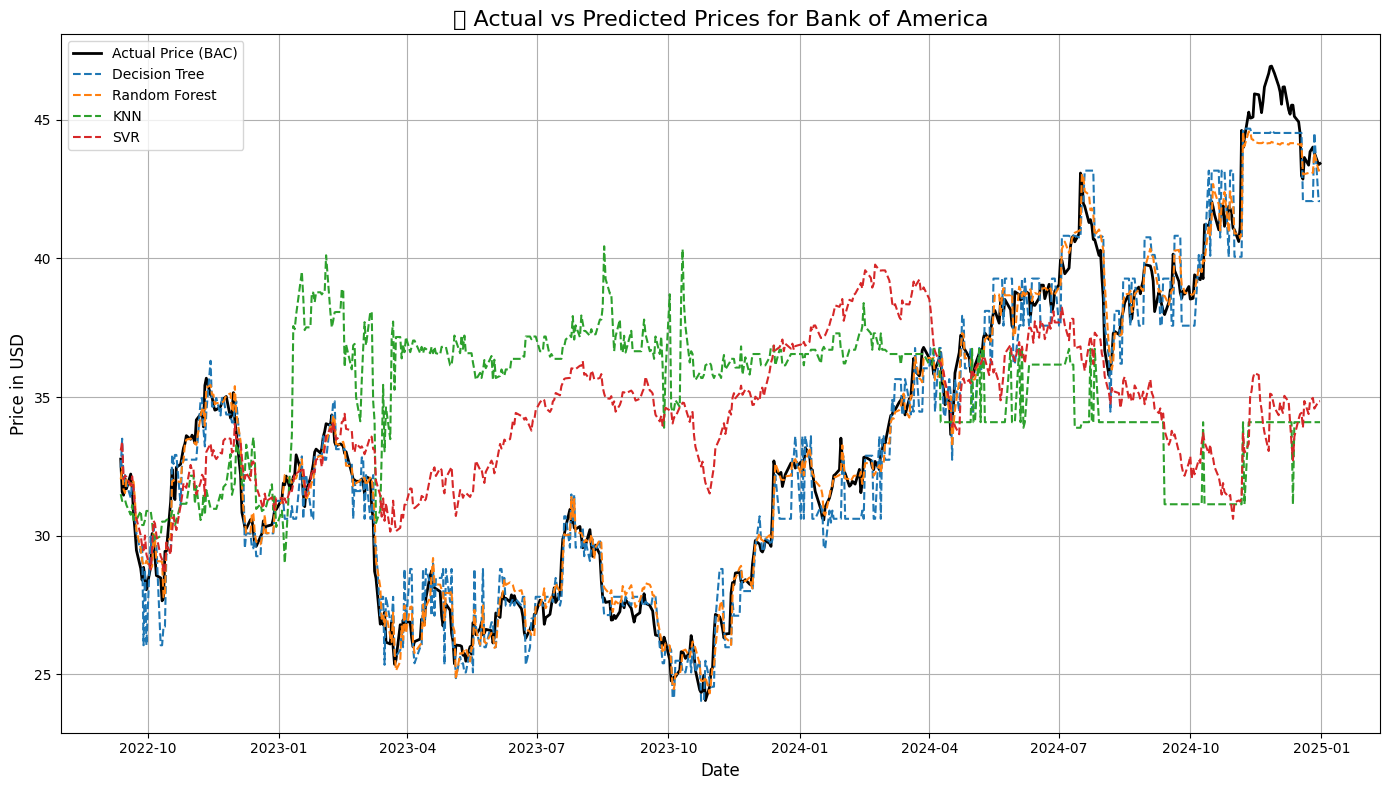

In [150]:
# prediction plot 


import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Actual
plt.plot(Y_test.index, Y_test, label='Actual Price (BAC)', color='black', linewidth=2)

# Predictions
plt.plot(Y_test.index, dt_pred, label='Decision Tree', linestyle='--')
plt.plot(Y_test.index, rf_pred, label='Random Forest', linestyle='--')
plt.plot(Y_test.index, knn_pred, label='KNN', linestyle='--')
plt.plot(Y_test.index, svr_pred, label='SVR', linestyle='--')

# Titles and Labels
plt.title("📊 Actual vs Predicted Prices for Bank of America", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price in USD", fontsize=12)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [151]:
# importance of all the features 


importance=dt_model.feature_importances_
feature_names=X_train.columns

df_features = pd.DataFrame({'Feature':feature_names, 'Importance':importance})
df_features = df_features.sort_values(by='Importance', ascending=False)
df_features

,Feature,Importance
0,BAC(t-1),0.997640
11,BAC(ma_5),0.000508
7,^VIX(t-1),0.000336
13,BAC(vol_5),0.000278
12,BAC(ma_10),0.000206
8,CL=F(t-1),0.000151
9,DX-Y.NYB(t-1),0.000140
10,GC=F(t-1),0.000136
2,JPM(t-1),0.000118
3,MS(t-1),0.000108
